# Analisis de Datos

Este notebook esta hecho para anlizar los datos opbtenidos, su completitud, organizacion y demas

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [6]:
path_file = "modismos_Dataset_Final.csv"

df = pd.read_csv(path_file, sep=";")
df

,palabra,significado,ejemplo,fuente
0,abajeño,Propio o nativo de las costas o de las tierras...,Empezaron cultivos de tabaco y a elaborar un d...,AcademiaColombianaLengua
1,abalear,Disparar a alguien o a algo de manera repetida...,El funcionario resultó ileso a pesar de que el...,AcademiaColombianaLengua
2,abalear,Herir o matar a alguien con disparos de un arm...,Limpiaba la hojarasca cuando hombres armados l...,AcademiaColombianaLengua
3,abaleo,Situación en la que hay disparos repetidos que...,Por la calle doce se oía un tremendo abaleo y ...,AcademiaColombianaLengua
4,abanicar,"En el beisbol, fallar el bateador al no tocar ...",El bateador se ponchó abanicando el tercer lan...,AcademiaColombianaLengua
...,...,...,...,...
10190,ñero,indigente que vive en la calle,NaN,DiccionarioCaroCuervo
10191,ñoco,"muñón, parte que queda de algunos objetos larg...",NaN,DiccionarioCaroCuervo
10192,ñoco,cuchillo muy desgastado,entre una manca y un manco/hicieron un alborot...,DiccionarioCaroCuervo
10193,ñola,excremento,NaN,DiccionarioCaroCuervo


In [7]:
df.isnull().sum()

palabra           0
significado       0
ejemplo        3855
fuente            0
dtype: int64

Acá podemos ver la parte de nuestros datos que carece de ejemplos. Por suerte, poseemos las definiciones de las palabras y en un futuro podran completarse esos ejemplos con el uso de un LLM

## Analisis de Cantidad de Modismos por Fuente

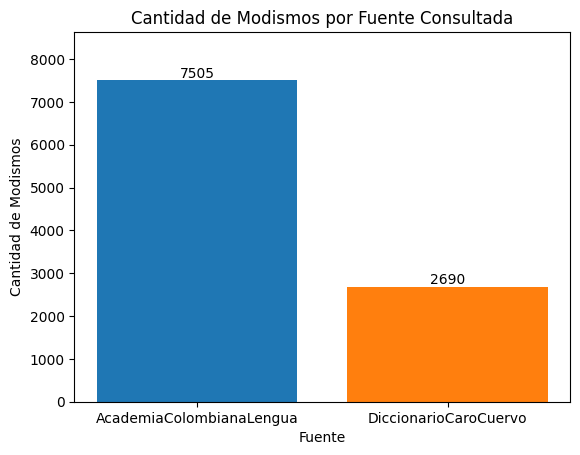

In [43]:
source_counts = df["fuente"].value_counts()

bars = plt.bar(source_counts.index, source_counts.values, color=['#1f77b4', '#ff7f0e'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.title("Cantidad de Modismos por Fuente Consultada")
plt.xlabel("Fuente")
plt.ylabel("Cantidad de Modismos")

# Ajustar el límite del eje Y para dar espacio a los números
plt.ylim(0, source_counts.max() * 1.15)

plt.show()

## Cantidad de Registros con Ejemplos y Sin Ejemplos

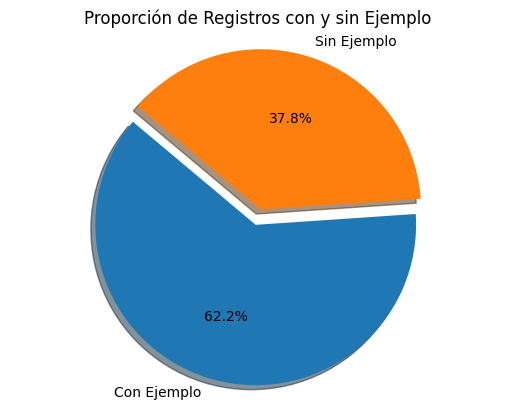

In [27]:
con_ejemplo = df['ejemplo'].notnull().sum()
sin_ejemplo = df['ejemplo'].isnull().sum()

# Datos para el pie chart
labels = ['Con Ejemplo', 'Sin Ejemplo']
sizes = [con_ejemplo, sin_ejemplo]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Proporción de Registros con y sin Ejemplo')
plt.axis('equal')
plt.show()

## Cantidad de Registros con Más de un significado

C:\Users\Ignacio\AppData\Local\Temp\ipykernel_23836\11075503.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  verbos_count = df['palabra'].str.contains(r'(ar|er|ir)$', na=False).sum()


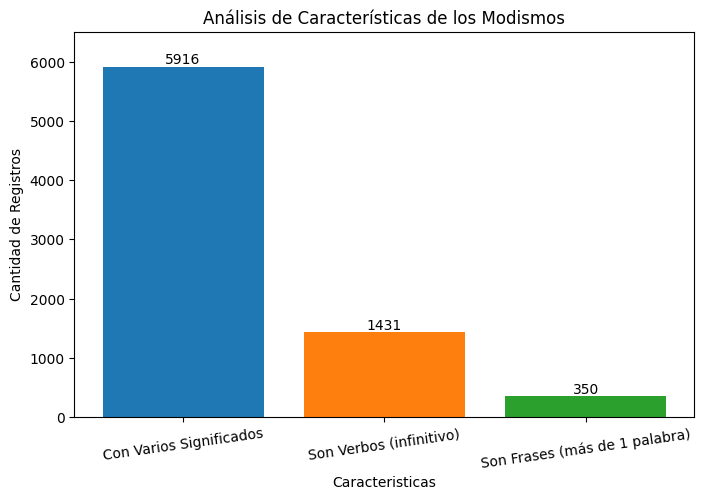

In [49]:
registros_varios_significados = df[df['palabra'].duplicated(keep=False)].shape[0]

verbos_count = df['palabra'].str.contains(r'(ar|er|ir)$', na=False).sum()

frases_count = df['palabra'].str.contains(' ', na=False).sum()

analysis_data = {
    'Con Varios Significados': registros_varios_significados,
    'Son Verbos (infinitivo)': verbos_count,
    'Son Frases (más de 1 palabra)': frases_count
}
analysis_series = pd.Series(analysis_data)

plt.figure(figsize=(8, 5))
bars = plt.bar(analysis_series.index, analysis_series.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center') # va='bottom' lo pone justo encima

plt.title('Análisis de Características de los Modismos')
plt.xlabel("Caracteristicas")
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=8)

plt.ylim(0, analysis_series.max() * 1.1) 

plt.show()